# Dataset Upload

In addition to creating and editing Datasets in the LangSmith UI, you can also create and edit datasets with the LangSmith SDK.

Let's go ahead an upload a list of examples that we have from our RAG application to LangSmith as a new dataset.

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(override=True)

True

In [2]:
from langsmith import Client

example_inputs = [
("How do I set up tracing to LangSmith if I'm using LangChain?", "To set up tracing to LangSmith while using LangChain, you need to set the environment variable `LANGSMITH_TRACING` to 'true'. Additionally, you must set the `LANGSMITH_API_KEY` environment variable to your API key. By default, traces will be logged to a project named \"default.\""),
("How can I trace with the @traceable decorator?", "To trace with the @traceable decorator in Python, simply decorate any function you want to log traces for by adding `@traceable` above the function definition. Ensure that the LANGSMITH_TRACING environment variable is set to 'true' to enable tracing, and also set the LANGSMITH_API_KEY environment variable with your API key. By default, traces will be logged to a project named \"default,\" but you can configure it to log to a different project if needed."),
("How do I pass metadata in with @traceable?", "You can pass metadata with the @traceable decorator by specifying arbitrary key-value pairs as arguments. This allows you to associate additional information, such as the execution environment or user details, with your traces. For more detailed instructions, refer to the LangSmith documentation on adding metadata and tags."),
("What is LangSmith used for in three sentences?", "LangSmith is a platform designed for the development, monitoring, and testing of LLM applications. It enables users to collect and analyze unstructured data, debug issues, and create datasets for testing and evaluation. The tool supports various workflows throughout the application development lifecycle, enhancing the overall performance and reliability of LLM applications."),
("What testing capabilities does LangSmith have?", "LangSmith offers capabilities for creating datasets of inputs and reference outputs to run tests on LLM applications, supporting a test-driven approach. It allows for bulk uploads of test cases, on-the-fly creation, and exporting from application traces. Additionally, LangSmith facilitates custom evaluations to score test results, enhancing the testing process."),
("Does LangSmith support online evaluation?", "Yes, LangSmith supports online evaluation as a feature. It allows you to configure a sample of runs from production to be evaluated, providing feedback on those runs. You can use either custom code or an LLM as a judge for the evaluations."),
("Does LangSmith support offline evaluation?", "Yes, LangSmith supports offline evaluation through its evaluation how-to guides and features for managing datasets. Users can manage datasets for offline evaluations and run various types of evaluations, including unit testing and auto-evaluation. This allows for comprehensive testing and improvement of LLM applications."),
("Can LangSmith be used for finetuning and model training?", "Yes, LangSmith can be used for fine-tuning and model training. It allows you to capture run traces from your deployment, query and filter this data, and convert it into a format suitable for fine-tuning models. Additionally, you can create training datasets to keep track of the data used for model training."),
("Can LangSmith be used to evaluate agents?", "Yes, LangSmith can be used to evaluate agents. It provides various evaluation strategies, including assessing the agent's final response, evaluating individual steps, and analyzing the trajectory of tool calls. These methods help ensure the effectiveness of LLM applications."),
("How do I create user feedback with the LangSmith sdk?", "To create user feedback with the LangSmith SDK, you first need to run your application and obtain the `run_id`. Then, you can use the `create_feedback` method, providing the `run_id`, a feedback key, a score, and an optional comment. For example, in Python, it would look like this: `client.create_feedback(run_id, key=\"feedback-key\", score=1.0, comment=\"comment\")`."),
]

client = Client()
# TODO: Fill in dataset id
dataset_id = "8a1d2349-001b-4389-9d2f-1761f770180f"

# Prepare inputs and outputs for bulk creation
inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
  inputs=inputs,
  outputs=outputs,
  dataset_id=dataset_id,
)

{'example_ids': ['1f16e22f-6abe-443a-aa4e-21598e1c1ab6',
  '4bea205a-ea82-42d0-a15f-6bb5b5129521',
  'a03ea8d2-4ed9-4160-8b64-5c16c01ce4a5',
  'af19e03e-4214-4b09-9297-ef19e9769cd6',
  '4e202564-da5a-4bc5-bc7e-f187d5b97788',
  '66dc8ce4-b64b-435c-8402-c51655526c49',
  '96e3dc14-8655-4b76-9f77-194b2ebe33e1',
  '013f5c2a-d656-4b5c-ac2a-7aa6d9851055',
  'bb5d51d9-2c74-4b17-9f5e-413064e943fd',
  '3420d01a-4d5f-4a66-92ff-46de047122ec'],
 'count': 10}

**We populated the dataset named RAG Application Golden dataset with examples.**

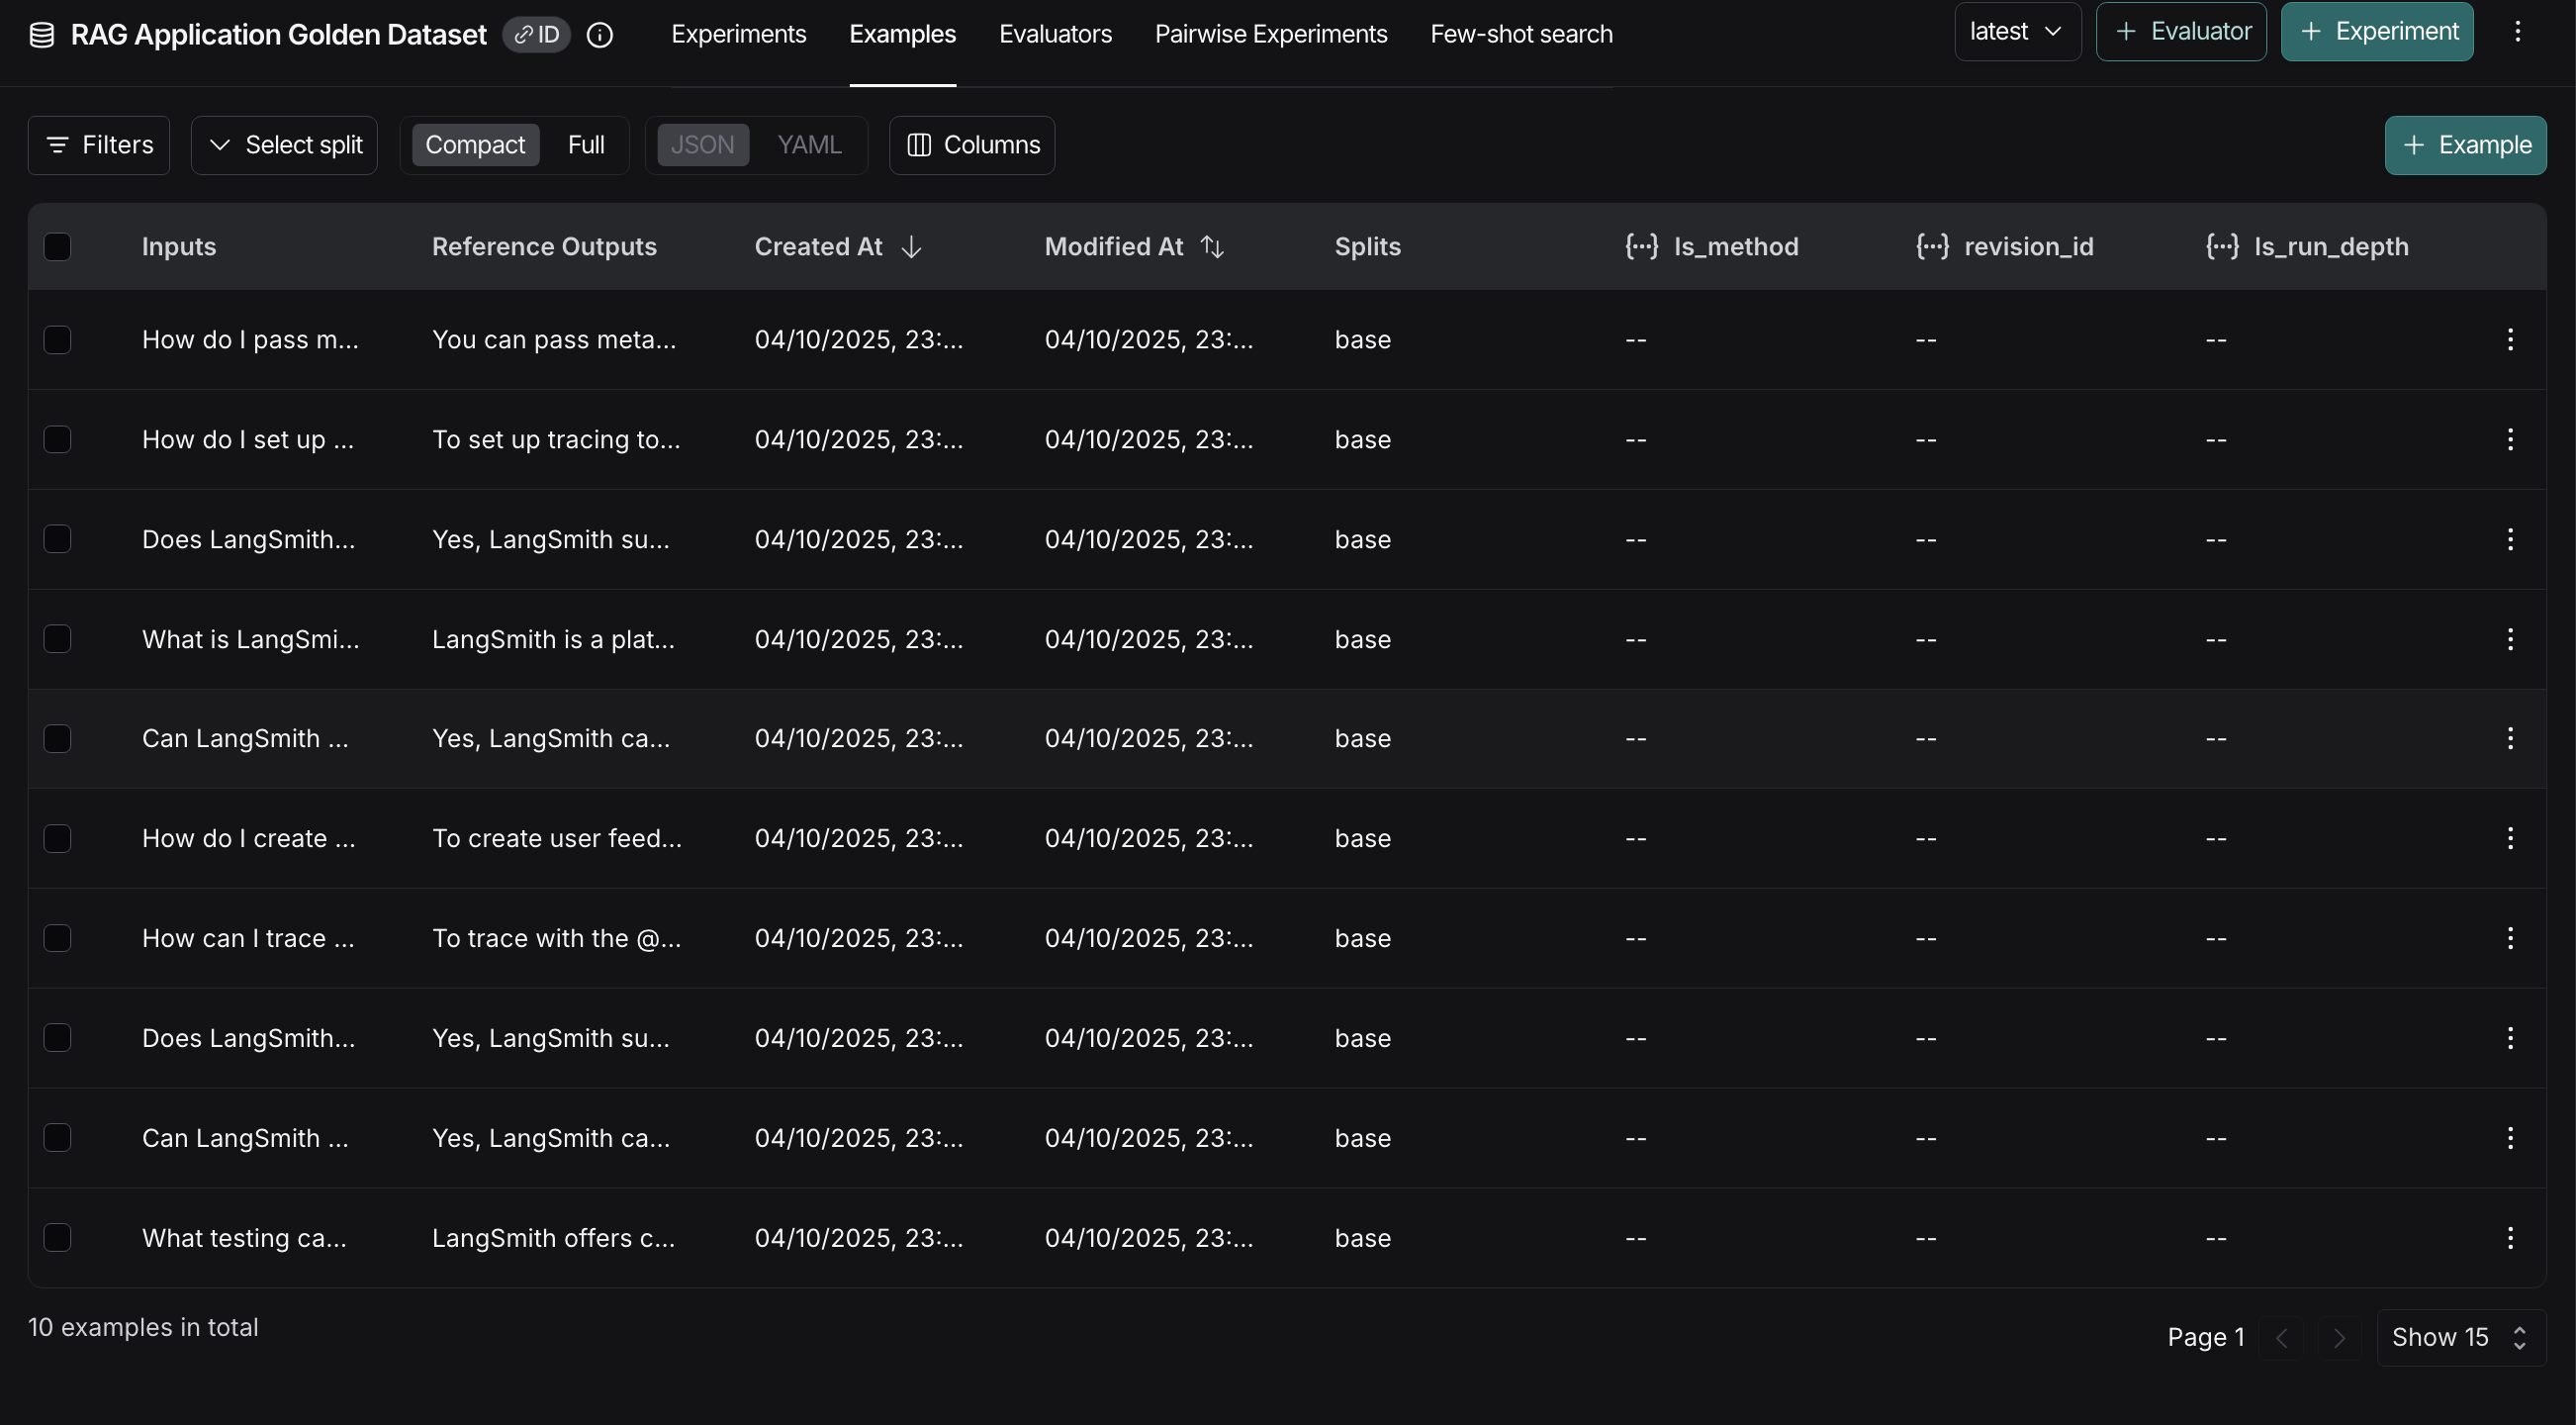

## Submitting another Trace

I've moved our RAG application definition to `app.py` so we can quickly import it.

In [3]:
from app import langsmith_rag

USER_AGENT environment variable not set, consider setting it to identify your requests.


Let's ask another question to create a new trace!

In [4]:
question = "How do I set up tracing to LangSmith if I'm using LangChain?"
langsmith_rag(question)

'To set up tracing to LangSmith using LangChain, ensure your LangSmith instance is running and properly configured to accept traces. You will need to use the LangChain tracer or LangSmith SDK, providing the hostname for your LangSmith instance without requiring API keys in a no-auth setup. For best practices, consider setting up DNS, SSL for encryption, and authentication for added security.'

### We can see that our trace was added to the dataset by following the steps as shown in the images.

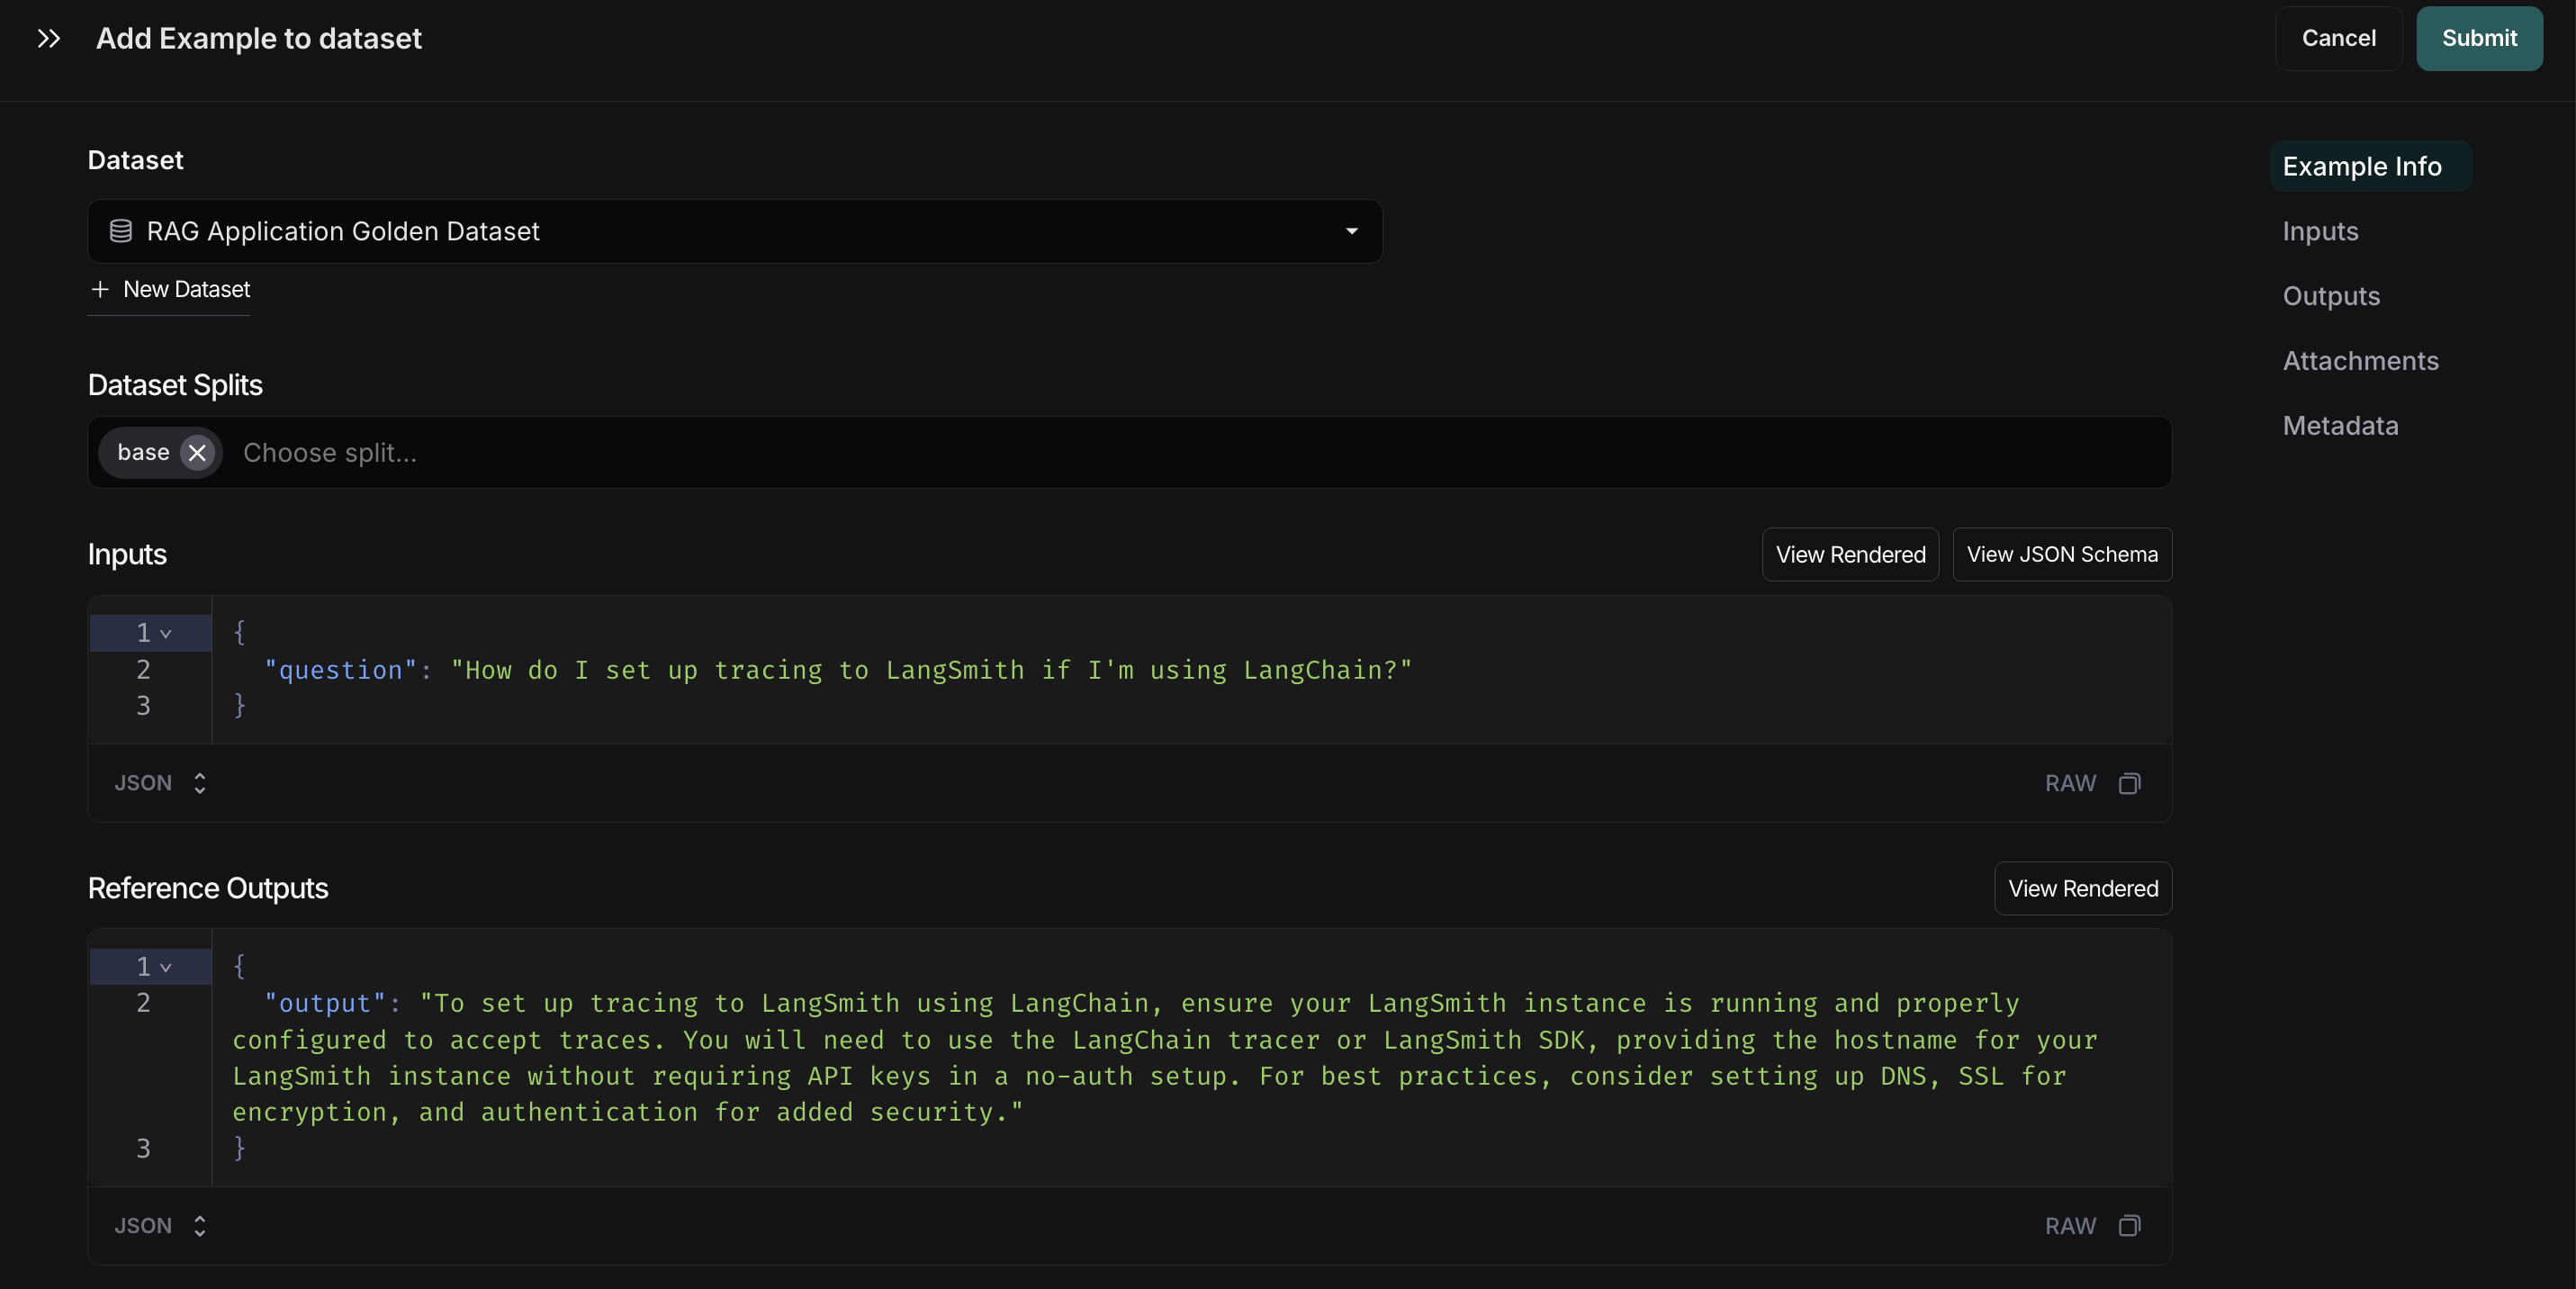

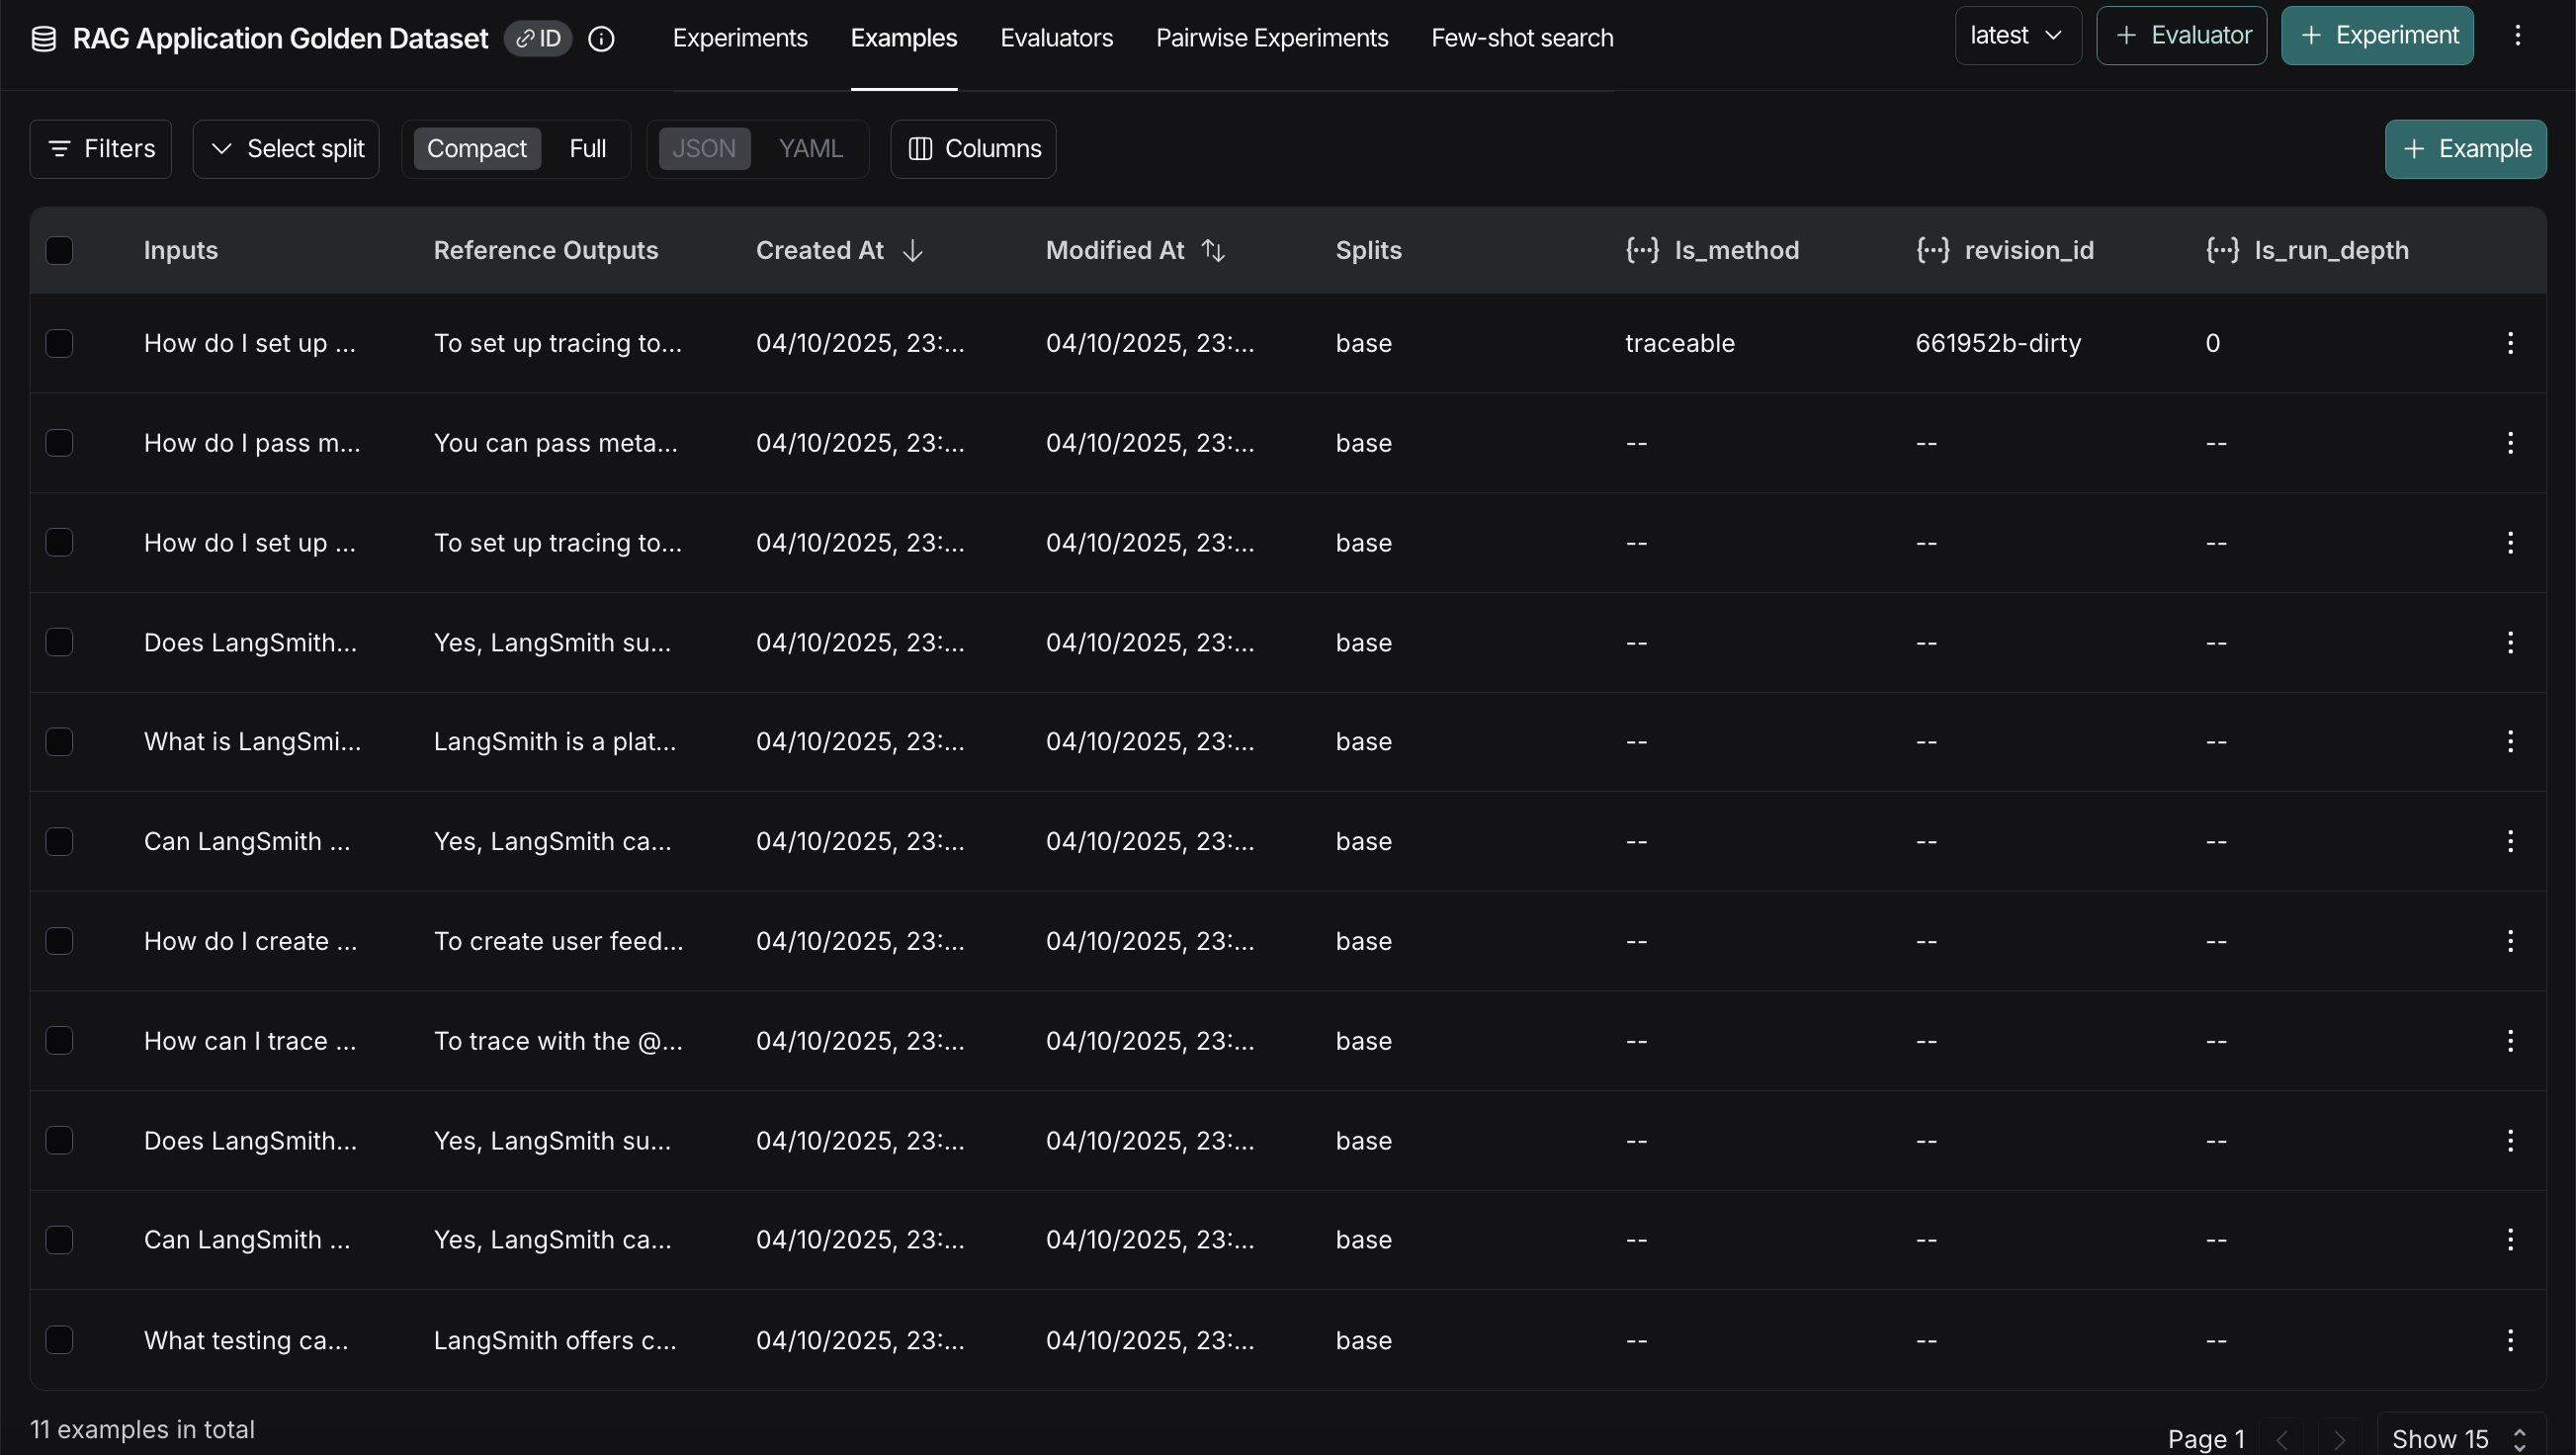

### I also edited the dataset to put in the input and output schema :

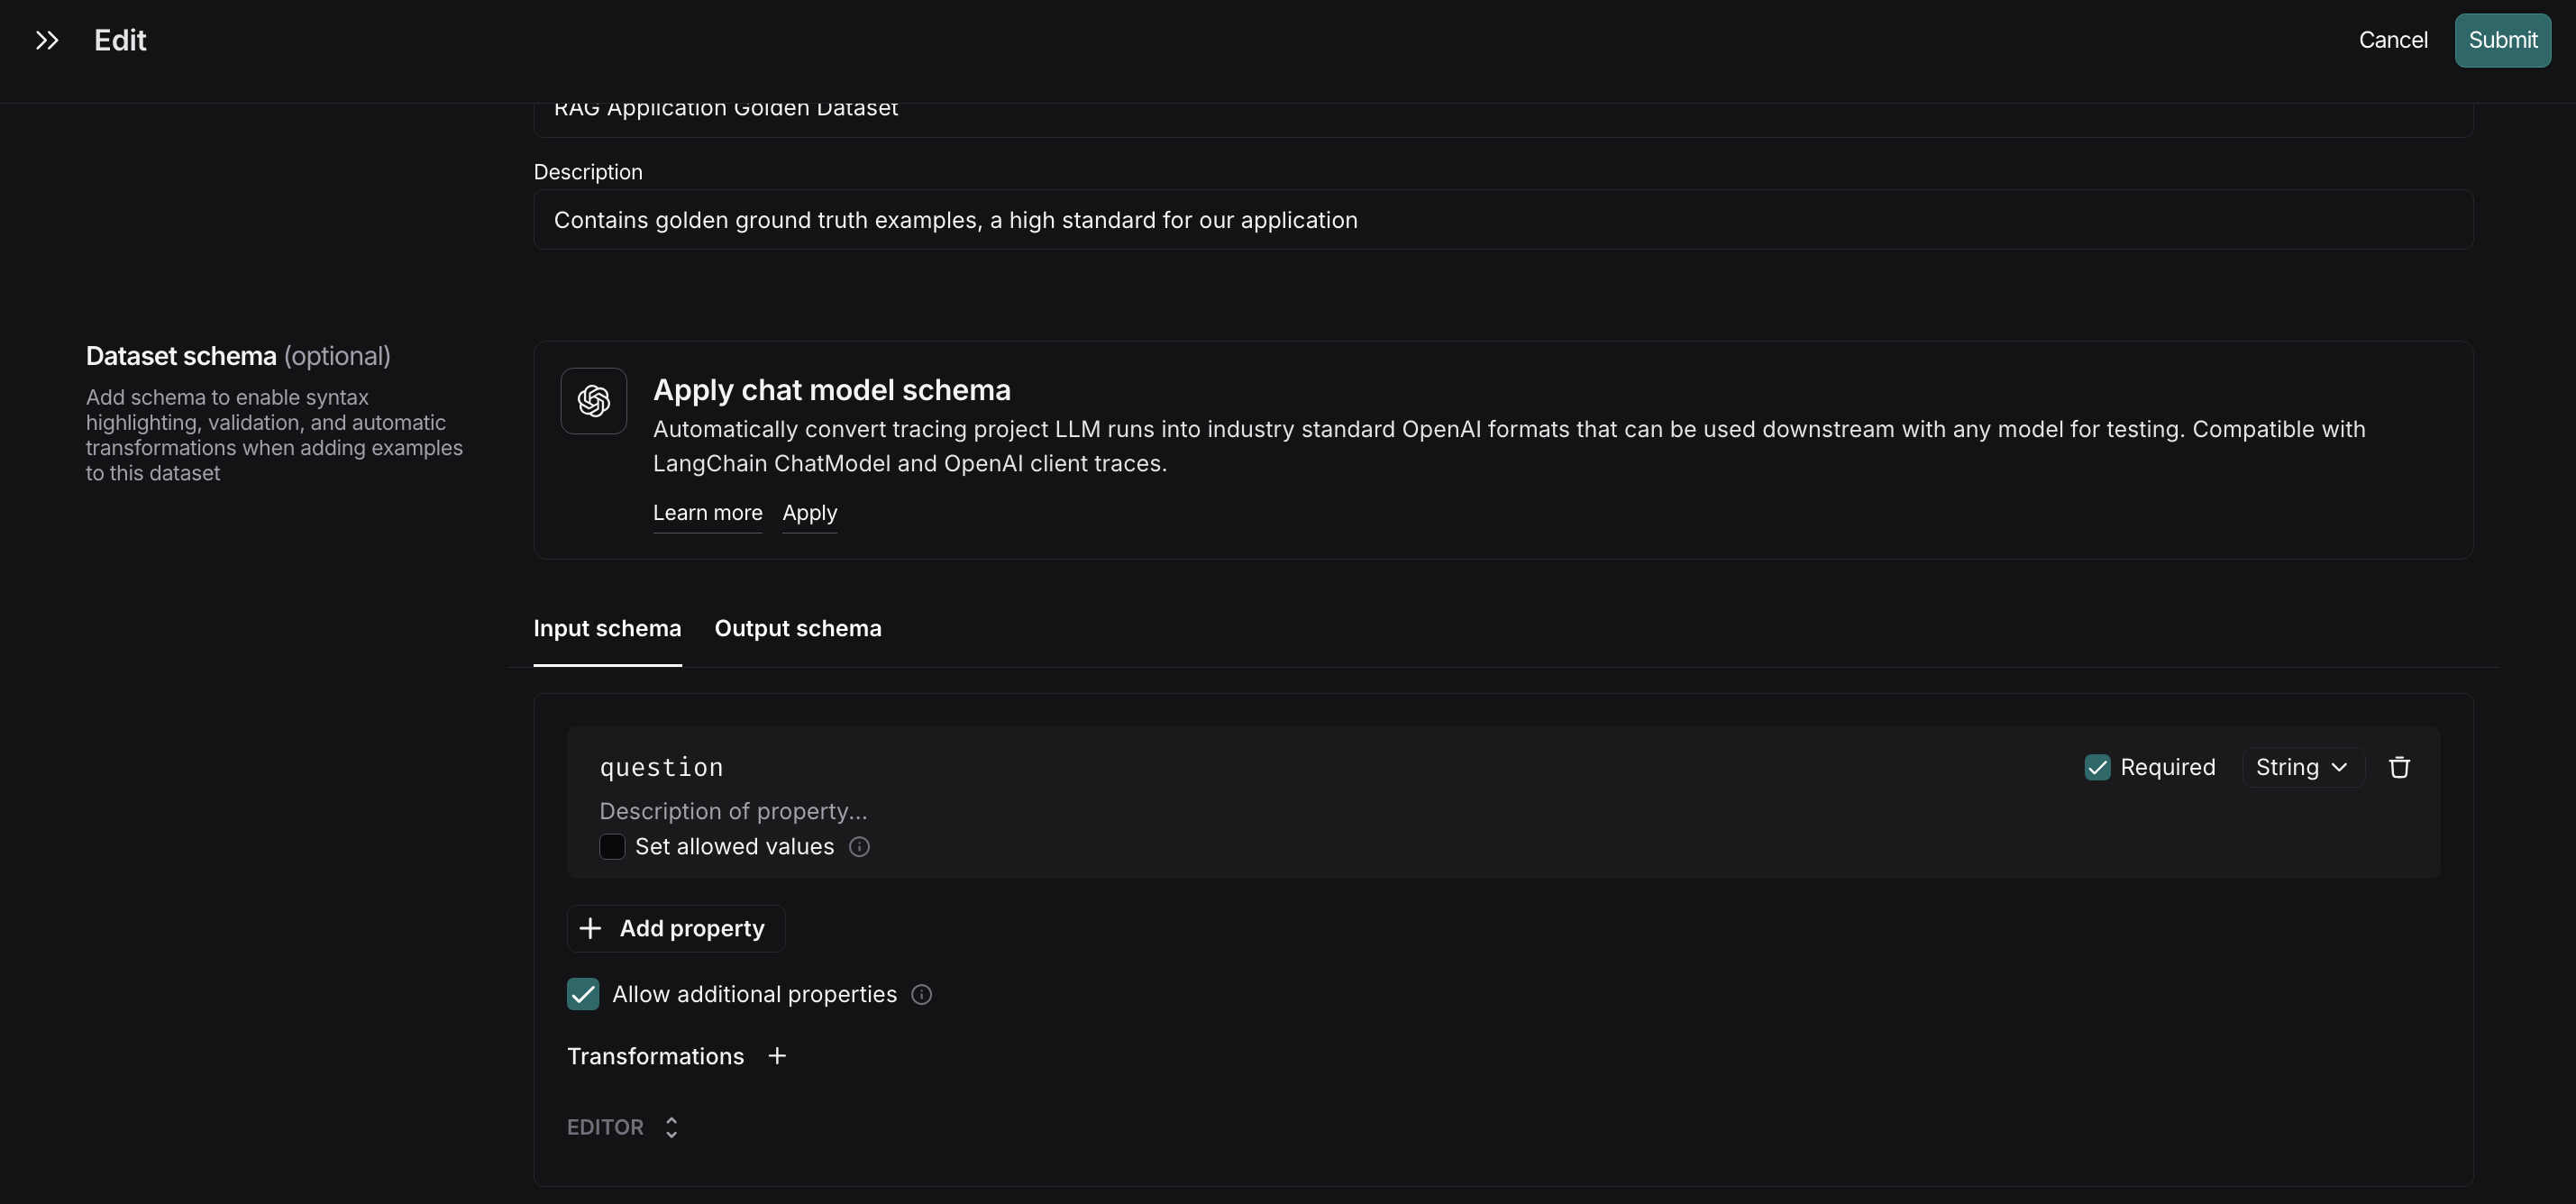

### I AI generated some examples in the Dataset : 

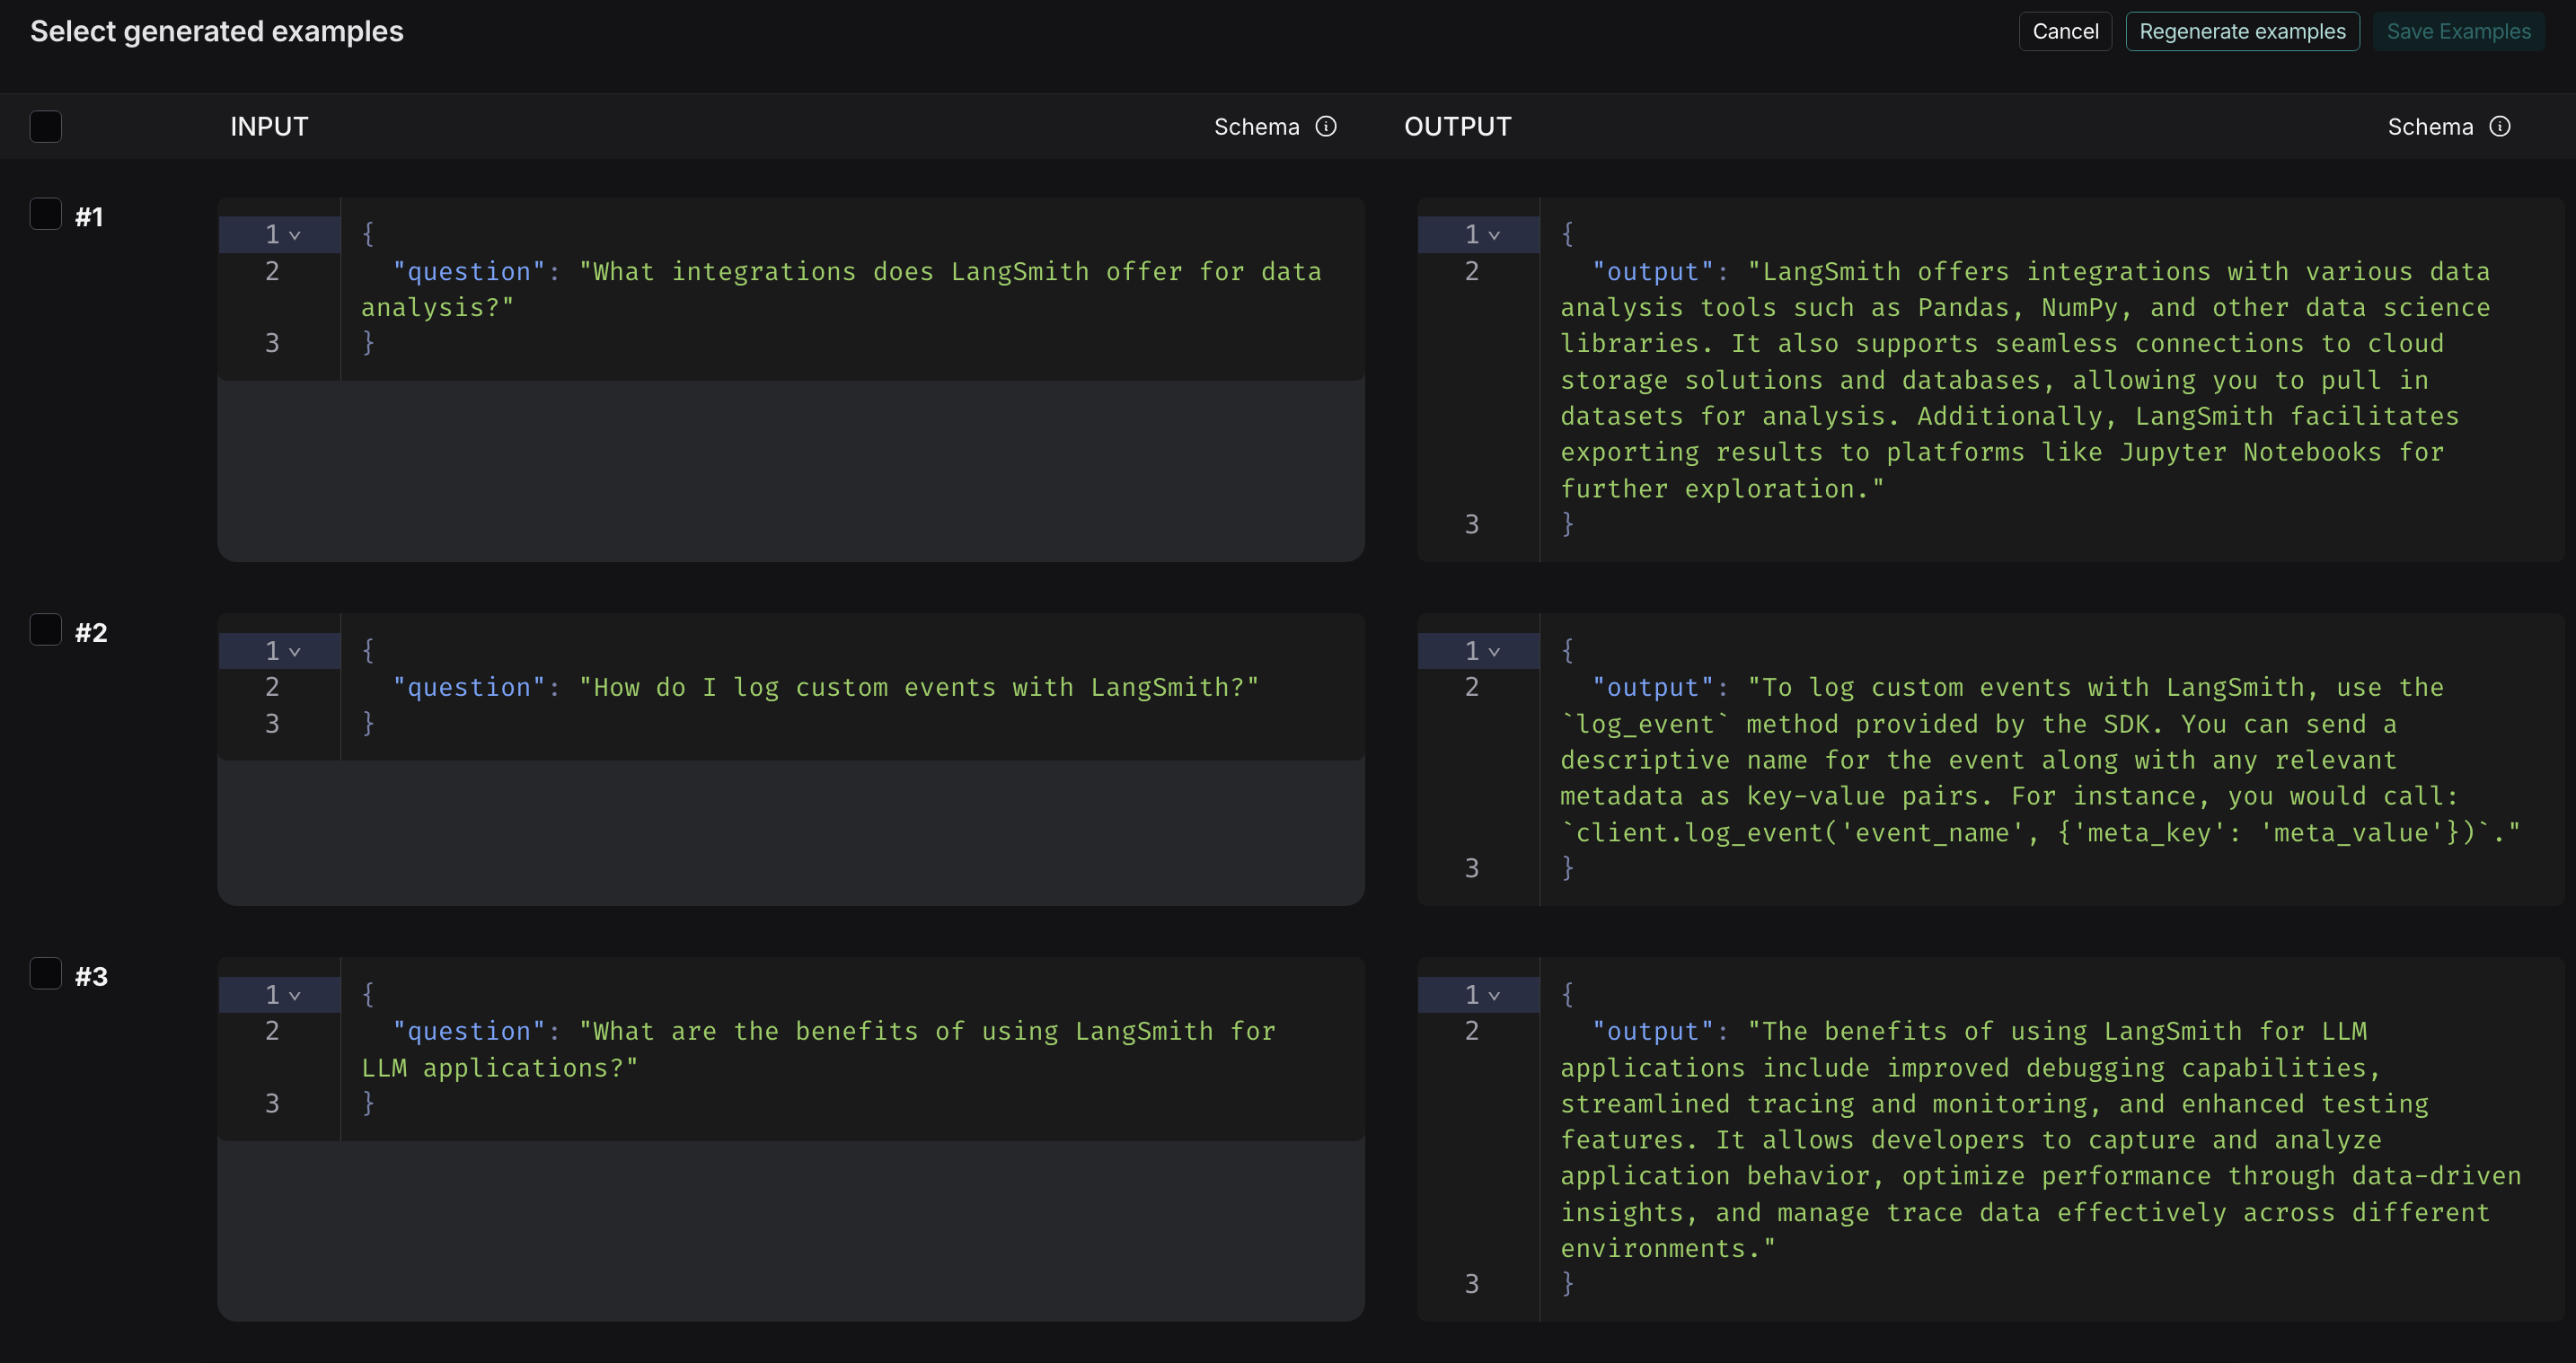

### AI generated examples have source listed as 'synthetic'

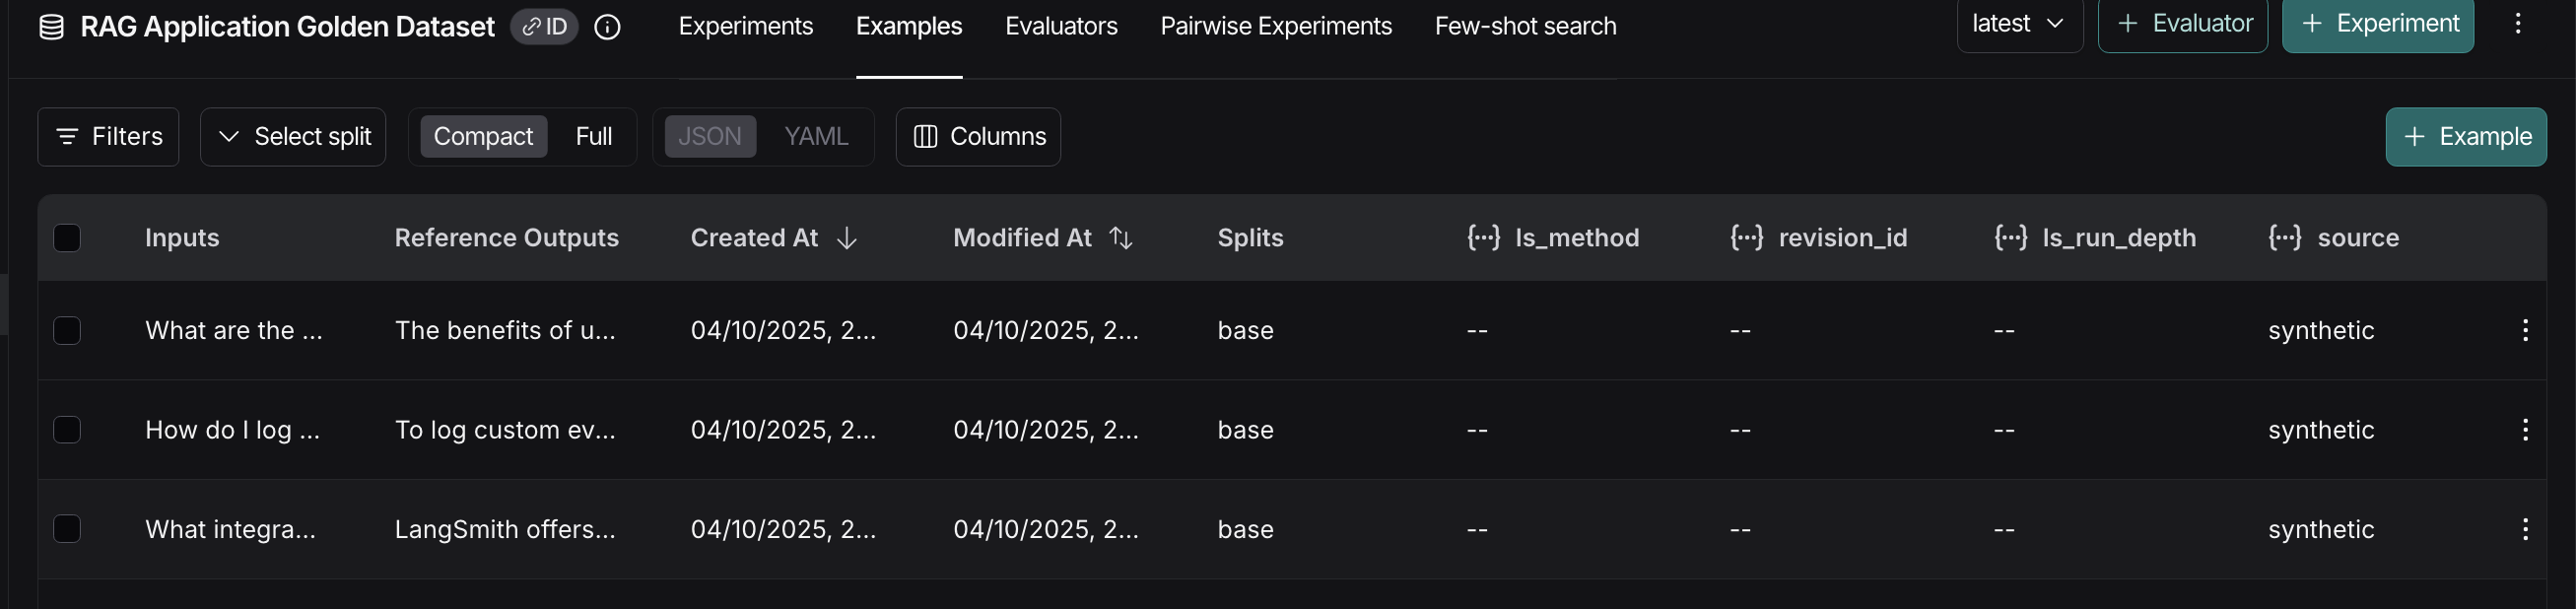

### Added a split in the dataset named Crucial Examples

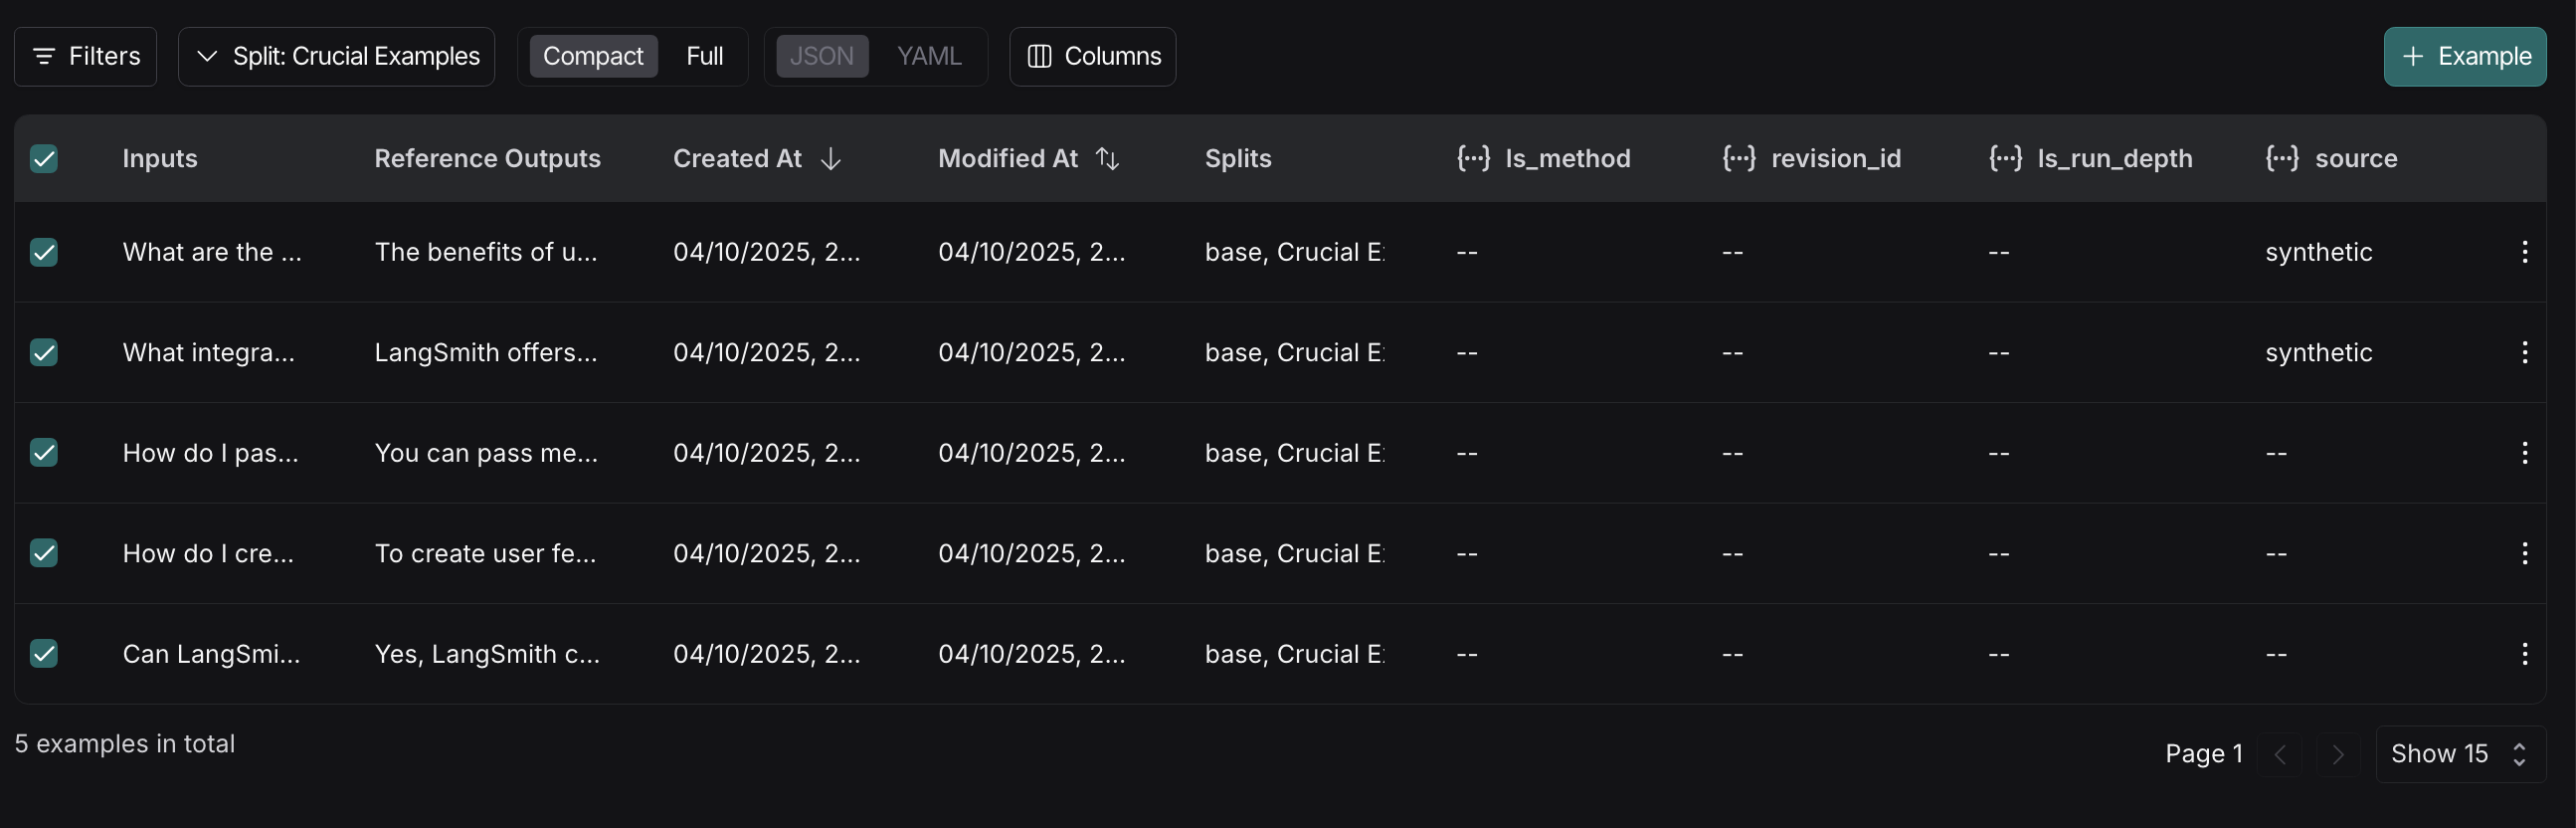

# Wrote a code to populate a new dataset of my own

In [5]:
from langsmith import Client

example_inputs = [
    ("Why is the sky blue?", 
     "The sky appears blue because of a phenomenon called Rayleigh scattering. Shorter blue wavelengths of sunlight are scattered in all directions by the molecules and particles in the atmosphere."),
    
    ("How many bones are in the human body?", 
     "An adult human has 206 bones. At birth, there are around 270, but some bones fuse together as we grow."),
    
    ("What causes rainbows?", 
     "Rainbows are caused by the refraction, dispersion, and reflection of sunlight in water droplets, which splits the light into its component colors."),
    
    ("Why do cats purr?", 
     "Cats purr as a form of communication and self-soothing. It can indicate contentment, but they also purr when in pain or stressed."),
    
    ("How does photosynthesis work?", 
     "Photosynthesis is the process by which green plants use sunlight to convert carbon dioxide and water into glucose and oxygen. It occurs in the chloroplasts of plant cells."),
    
    ("What is the tallest mountain in the world?", 
     "Mount Everest is the tallest mountain in the world above sea level, standing at 8,848.86 meters (29,031.7 feet)."),
    
    ("Why do we sleep?", 
     "Sleep helps the body repair, consolidate memory, and regulate emotions. It’s essential for physical and mental health."),
    
    ("How do airplanes stay in the air?", 
     "Airplanes stay in the air because of lift, which is created by the wings as they move through the air. Lift counters gravity and allows the plane to fly."),
    
    ("What is gravity?", 
     "Gravity is the force that attracts two bodies toward each other. On Earth, it gives weight to physical objects and causes them to fall when dropped."),
    
    ("Why do leaves change color in autumn?", 
     "In autumn, chlorophyll in leaves breaks down, revealing pigments like carotenoids and anthocyanins, which cause the red, yellow, and orange colors."),
]

client = Client()

# Replace this with your actual dataset ID
dataset_id = "d8968fe0-60ed-4e5a-ac64-8051f66e8189"

inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
    inputs=inputs,
    outputs=outputs,
    dataset_id=dataset_id,
)


{'example_ids': ['d277c736-7c05-4dff-ad6a-95ebf3912dcd',
  'ac646e2a-f047-40d7-8836-bcfc78ec3389',
  'c4a2d2be-2329-4ceb-b20b-ab4c3e28c6fb',
  'e4cb3445-15fd-4876-a162-e90f1877e262',
  'f59b802d-1f43-4148-8f87-12fa183285ad',
  '2495beef-cc80-4642-a68b-4aac98984f7e',
  'e1bc6e2f-3728-4f0a-a6c8-c648a5db7e0d',
  '2fe9c5c2-19eb-4adb-9388-e471dffd1e1a',
  '62cf05d1-eb91-4d00-94bf-86255131684d',
  'cab986e6-fd37-4c62-baa6-abfad4d4e3ac'],
 'count': 10}

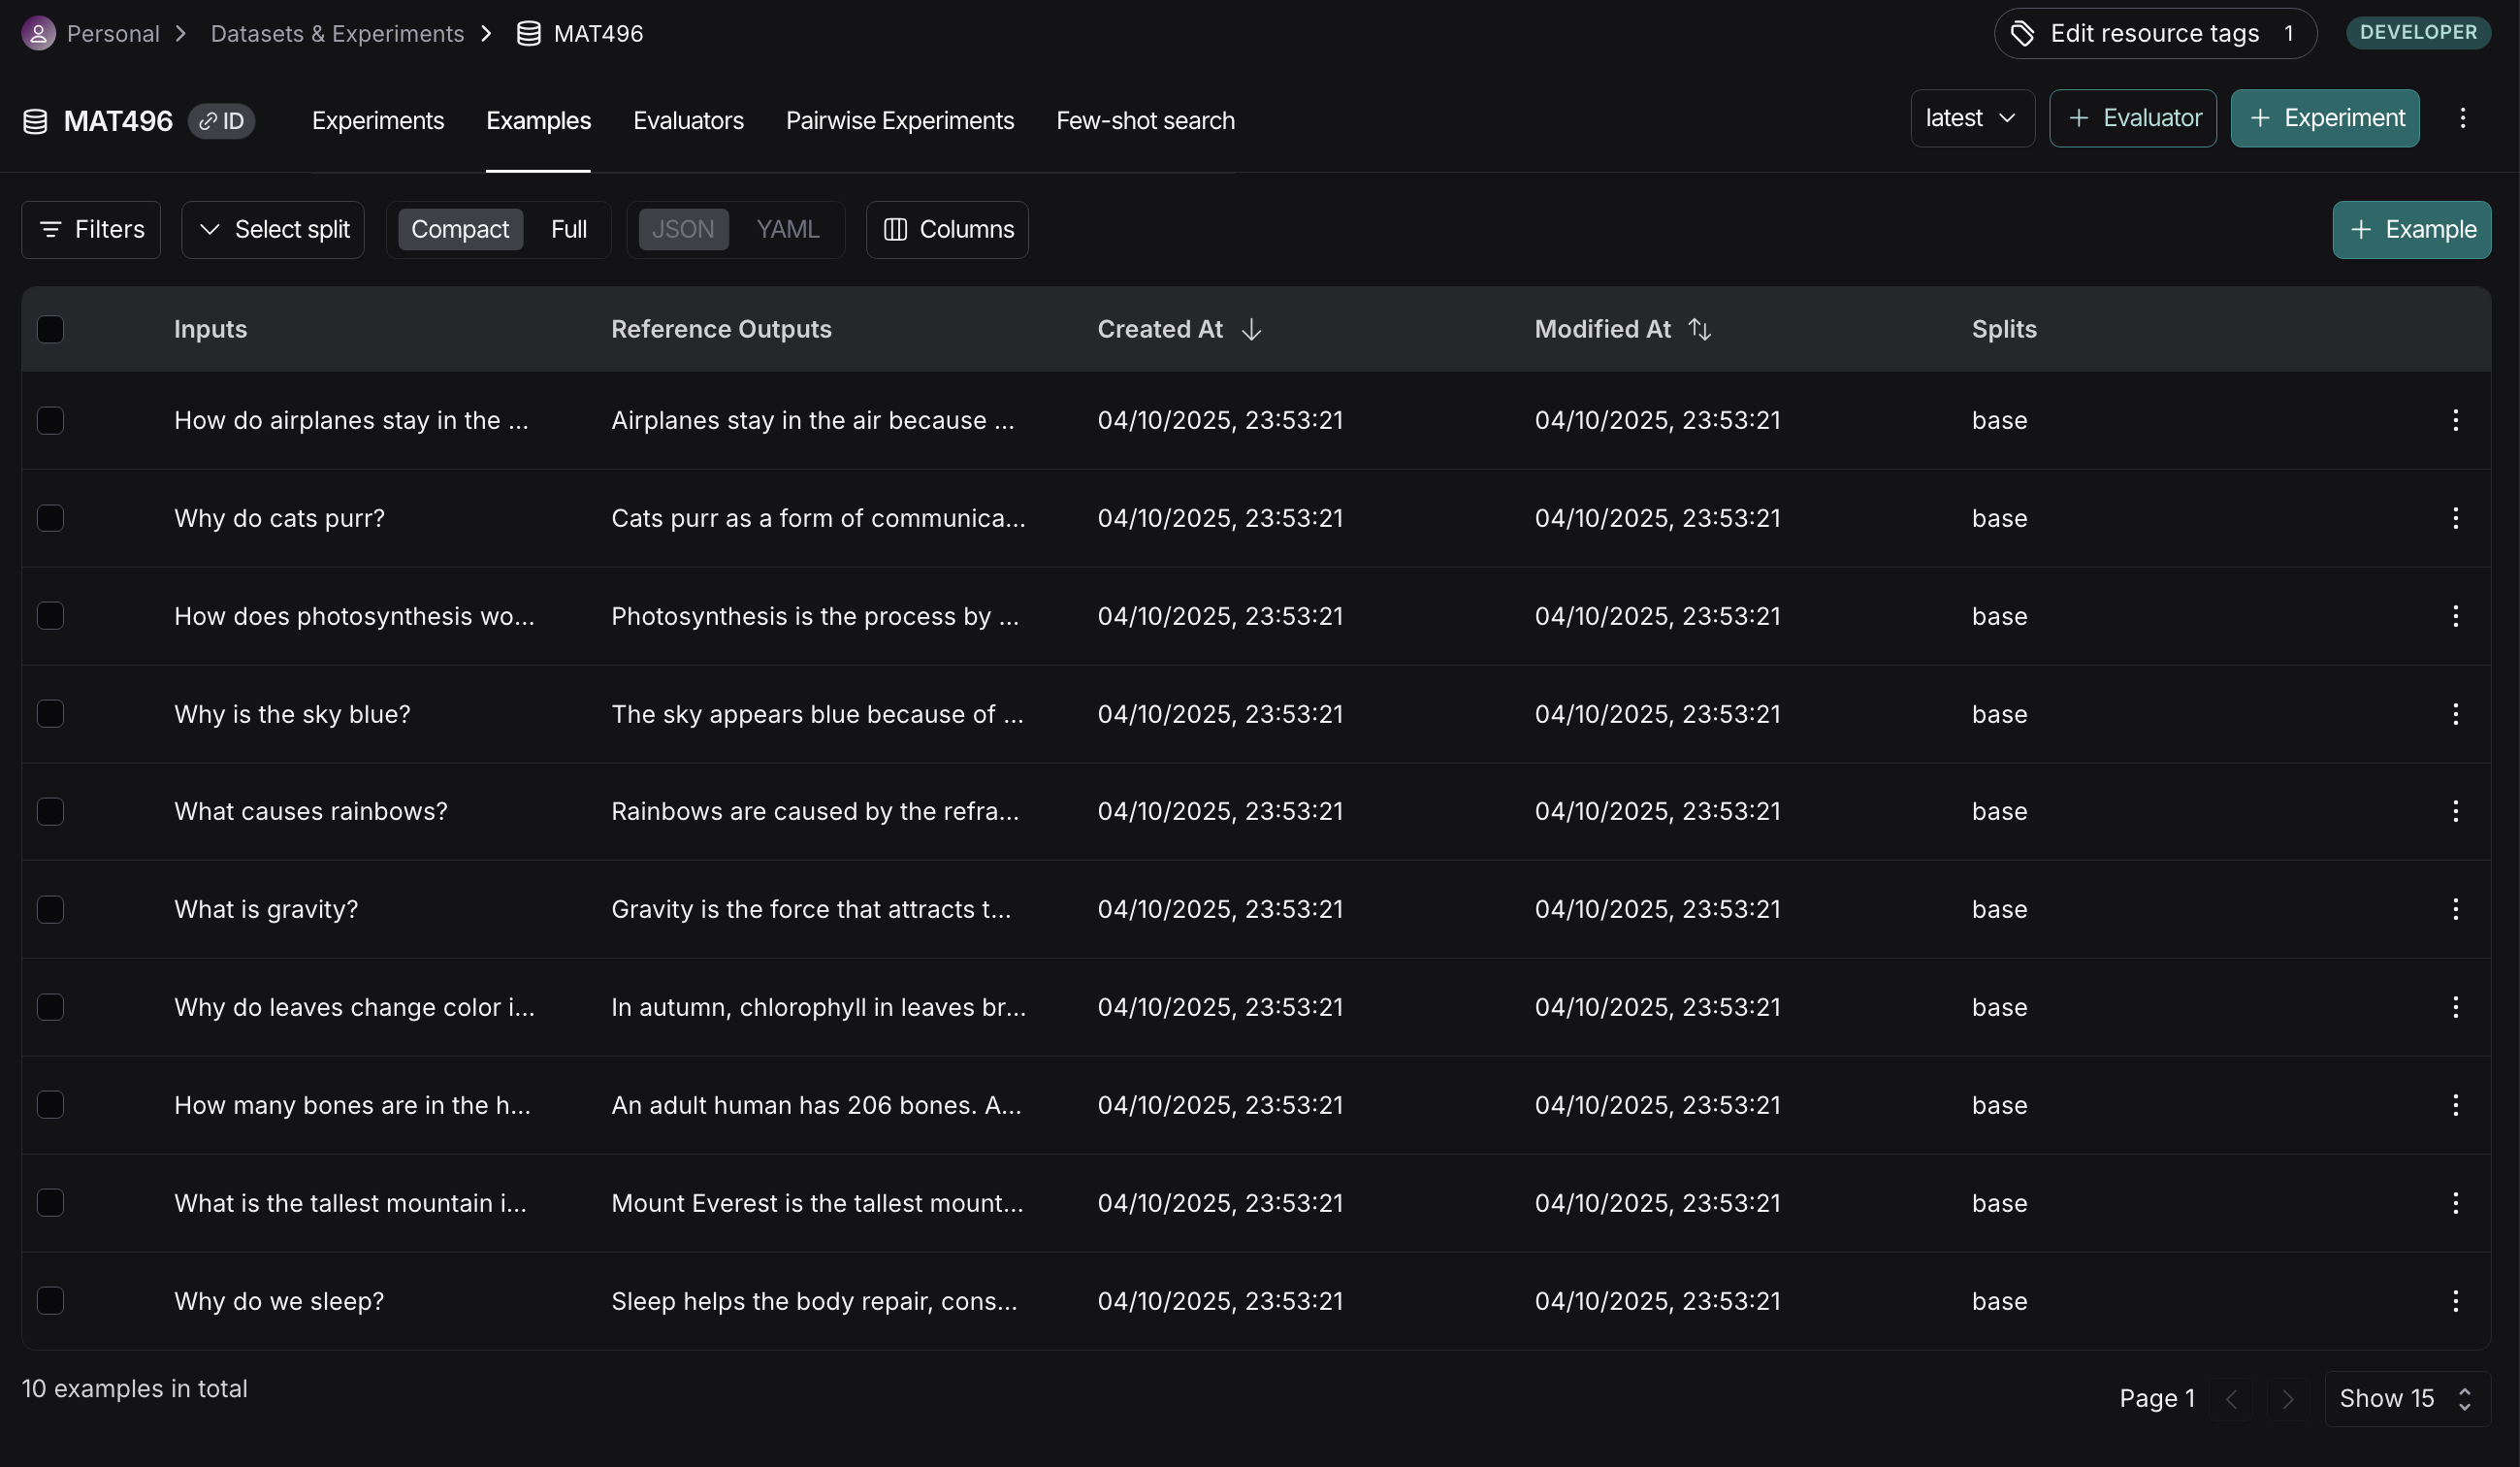